In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [2]:
lines = []
with open('out/graph_julia.out') as f:
    lines = f.readlines()

In [3]:
# split lines into two lists (split on empty line)
bisection = []
recursive = []
for i, line in enumerate(lines):
    if line == '\n':
        bisection = lines[:i]
        recursive = lines[i+1:]
        break

# filter lines that dont start with "│"
bisection = list(filter(lambda x: x.startswith('│'), bisection))
recursive = list(filter(lambda x: x.startswith('│'), recursive))

bisection

['│          Mesh │ Coordinate │   Metis │ Inertial │ Spectral │\n',
 '│               │            │ v.5.1.0 │          │          │\n',
 '│       mesh1e1 │       18.0 │    17.0 │     20.0 │     17.0 │\n',
 '│       mesh2e1 │       37.0 │    34.0 │     47.0 │     35.0 │\n',
 '│       mesh3e1 │       19.0 │    18.0 │     22.0 │     26.0 │\n',
 '│      airfoil1 │       94.0 │    73.0 │     93.0 │     59.0 │\n',
 '│ netz4504_dual │       25.0 │    20.0 │     27.0 │     24.0 │\n',
 '│         stufe │       16.0 │    17.0 │     16.0 │     16.0 │\n',
 '│          3elt │      172.0 │    90.0 │    257.0 │     94.0 │\n',
 '│        barth4 │      206.0 │   100.0 │    208.0 │     96.0 │\n',
 '│       ukerbe1 │       32.0 │    30.0 │     28.0 │     28.0 │\n',
 '│         crack │      353.0 │   200.0 │    384.0 │    232.0 │\n']

In [4]:
# trim whitespace and "|"
bisection = list(map(lambda x: x.strip("│").strip(), bisection))
recursive = list(map(lambda x: x.strip("│").strip(), recursive))
bisection

['Mesh │ Coordinate │   Metis │ Inertial │ Spectral │',
 '│            │ v.5.1.0 │          │          │',
 'mesh1e1 │       18.0 │    17.0 │     20.0 │     17.0 │',
 'mesh2e1 │       37.0 │    34.0 │     47.0 │     35.0 │',
 'mesh3e1 │       19.0 │    18.0 │     22.0 │     26.0 │',
 'airfoil1 │       94.0 │    73.0 │     93.0 │     59.0 │',
 'netz4504_dual │       25.0 │    20.0 │     27.0 │     24.0 │',
 'stufe │       16.0 │    17.0 │     16.0 │     16.0 │',
 '3elt │      172.0 │    90.0 │    257.0 │     94.0 │',
 'barth4 │      206.0 │   100.0 │    208.0 │     96.0 │',
 'ukerbe1 │       32.0 │    30.0 │     28.0 │     28.0 │',
 'crack │      353.0 │   200.0 │    384.0 │    232.0 │']

In [5]:
# combine frist two rows into one
def to_df(list: List[str]):
    new_list = []
    x_1 = list[0].split("│")
    x_2 = list[1].split("│")

    for i in range(len(x_1)):
        if x_1[i].strip() == "":
            new_list.append(x_2[i].strip())
        elif x_2[i].strip() == "":
            new_list.append(x_1[i].strip())
        else:
            new_list.append(x_1[i].strip() + " " + x_2[i].strip())

    # remove first two rows
    list = list[2:]

    list = [[i.strip() for i in x.split("│")] for x in list]

    list.insert(0, new_list)
    
    return pd.DataFrame(list[1:], columns=list[0])



df_1 = to_df(bisection)
df_2 = to_df(recursive)

In [6]:
# rename column "Metis v.5.1.0" to "Metis"
df_1 = df_1.rename(columns={"Metis v.5.1.0": "Metis"})
df_1

,Mesh,Coordinate,Metis,Inertial,Spectral,
0,mesh1e1,18.0,17.0,20.0,17.0,
1,mesh2e1,37.0,34.0,47.0,35.0,
2,mesh3e1,19.0,18.0,22.0,26.0,
3,airfoil1,94.0,73.0,93.0,59.0,
4,netz4504_dual,25.0,20.0,27.0,24.0,
5,stufe,16.0,17.0,16.0,16.0,
6,3elt,172.0,90.0,257.0,94.0,
7,barth4,206.0,100.0,208.0,96.0,
8,ukerbe1,32.0,30.0,28.0,28.0,
9,crack,353.0,200.0,384.0,232.0,


In [7]:
df_2

,Mesh,Coordinate 8 parts,Coordinate 16 parts,Metis (KWAY) 8 parts,Metis(KWAY) 16 parts,Metis (RECURSIVE) 8 parts,Metis(RECURSIVE) 16 parts,Inertial 8 parts,Inertial 16 parts,Spectral 8 parts,Spectral 16 parts,
0,mesh3e1,75.0,118.0,71.0,217.0,74.0,112.0,86.0,300.0,70.0,113.0,
1,airfoil1,516.0,819.0,321.0,545.0,324.0,566.0,670.0,1081.0,327.0,578.0,
2,netz4504_dual,127.0,198.0,99.0,160.0,101.0,159.0,166.0,270.0,105.0,174.0,
3,stufe,123.0,228.0,113.0,193.0,110.0,196.0,322.0,605.0,124.0,216.0,
4,3elt,733.0,1168.0,383.0,636.0,402.0,645.0,814.0,1230.0,372.0,671.0,
5,barth4,875.0,1306.0,419.0,683.0,409.0,716.0,977.0,1494.0,505.0,758.0,
6,ukerbe1,225.0,374.0,119.0,230.0,140.0,237.0,340.0,498.0,116.0,226.0,
7,crack,1344.0,1861.0,776.0,1186.0,736.0,1238.0,1351.0,1884.0,804.0,1303.0,


In [8]:
# reshape df from
# Mesh, bisection_type1, bisection_type2, ...
# mesh3e1, <edge_cut_value>, <edge_cut_value>, ...
# to
# Mesh, type, Edge_cut

df_1 = df_1.melt(id_vars=["Mesh"], var_name="Type", value_name="Edge_cut")
df_2 = df_2.melt(id_vars=["Mesh"], var_name="Type", value_name="Edge_cut")

# combine dfs

df = pd.concat([df_1, df_2])

# make Edge_cut numeric
df["Edge_cut"] = pd.to_numeric(df["Edge_cut"])

# drop all rows where type is NaN or empty
df = df.dropna(subset=["Edge_cut"])

# add column parts to df
# find number in string Type (if no number is found, return 0)
df["parts"] = df["Type"].str.extract(r'(\d+)').fillna(2).astype(int)

# remove " parts" from all values in column Type
df["Type"] = df["Type"].str.replace(" parts", "")

# sort by parts and Mesh
df = df.sort_values(by=["parts"])

df


,Mesh,Type,Edge_cut,parts
0,mesh1e1,Coordinate,18.0,2
22,mesh3e1,Inertial,22.0,2
23,airfoil1,Inertial,93.0,2
24,netz4504_dual,Inertial,27.0,2
25,stufe,Inertial,16.0,2
...,...,...,...,...
12,3elt,Coordinate 16,1168.0,16
24,mesh3e1,Metis(KWAY) 16,217.0,16
10,netz4504_dual,Coordinate 16,198.0,16
8,mesh3e1,Coordinate 16,118.0,16


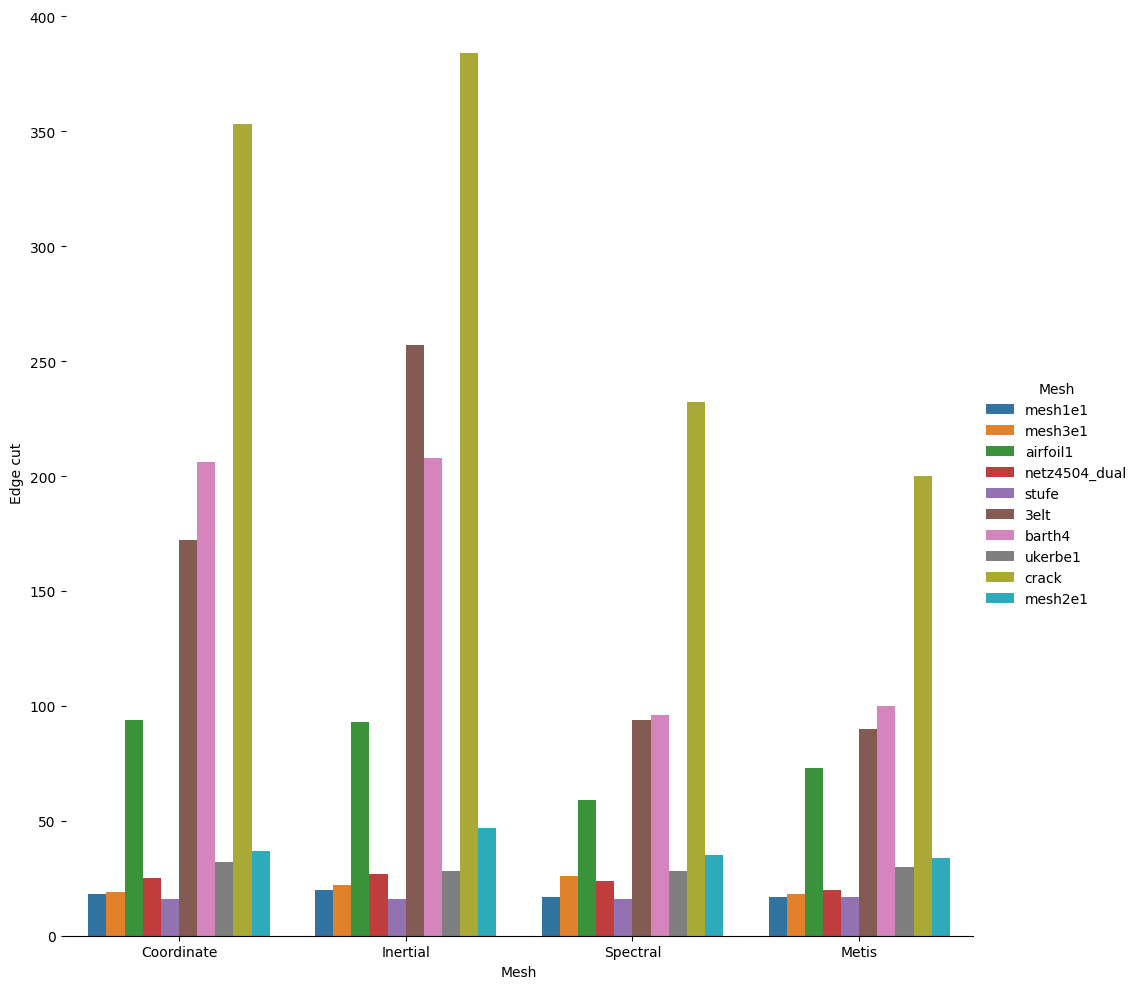

In [9]:
g = sns.catplot(
    data=df[df["parts"] <= 2],
    x="Type", 
    y="Edge_cut",
    hue="Mesh",
    kind="bar",
    height=10,
)

g.despine(left=True)
g.set_axis_labels("Mesh", "Edge cut")

# set x labels to be vertical
#g.set_xticklabels(rotation=90)
 
# set y axis log
# g.set(yscale="log")
# save figure
plt.savefig("../../report/plots/graph/bisection.svg")

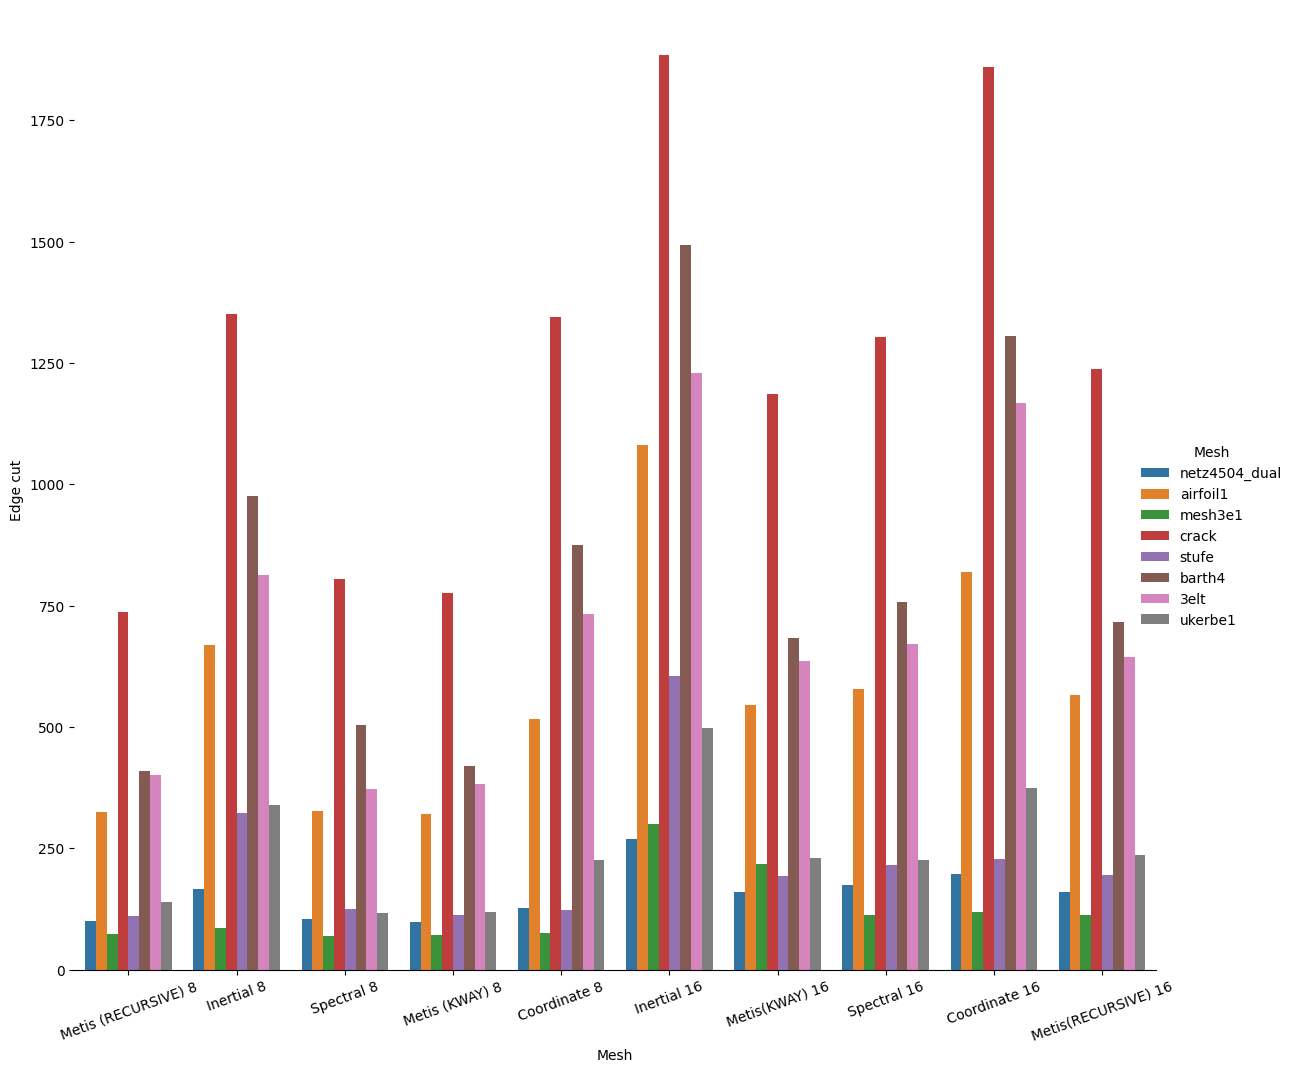

In [10]:
g = sns.catplot(
    data=df[df["parts"] > 2],
    x="Type", 
    y="Edge_cut",
    hue="Mesh",
    kind="bar",
    height=12,
)

g.despine(left=True)
g.set_axis_labels("Mesh", "Edge cut")

# set x labels to be vertical
g.set_xticklabels(rotation=20)

# set y axis log
# g.set(yscale="log")

# add some margin to figure so text is not cut off
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# save figure
plt.savefig("../../report/plots/graph/bisection_recursive.svg")